# Plan de trabajo: Análisis exploratorio de datos 

El plan de elaboración del proyecto se distruibuirá de la siguiente forma:

- Se analizará la información asignada por la persona a cargo del proyecto, buscando datos clave para generar preguntas aclaratorias que nos permitan comenzar acciones de manera eficaz y clara. Por otra parte, se realizará un Exploratory Data Analysis (EDA) para entender la distribucion de los datos en los diferentes archivos disponibles para la exploración, asi como para descubrir insights importantes para el cliente. A esta etapa la llamaremos Importación y revisión de datos.
- Después se harán visualizaciones de los insights clave para entender el objetivo: el church de clientes. Lo que conoceremos como visualización de datos.
- Enseguida se comenzará con la preparación de datos para el modelado. Esta será la parte 3. Preparación del modelado.
- A continuación se pondrá a prueba el modelado predictivo (clasificación binaria) para aplicación y evaluación de modelos. A la que asignaremos como la fase de Modelado predictivo.
- Finalmente se identificarán las conclusiones y recomendaciones del proyecto. 

Esta será la estructura básica del plan, a continuación se detallará cada sección de nuestro plan de trabajo. 

## Objetivo general

Analizar los datos disponibles de los clientes de la compañía de telecomunicaciones para identificar posibles aptrones o catacterísticas relacionadas con la **fuga (churn) de clientes**.

## Plan de acción : Importación y revisión de datos.

1. Para comenzar con nuestro analisis de datos es necesario importar los archivos necesarios y manejarlos o limpiarlos de la manera mas eficiente para nuestras necesidades, en esta ocasión enlazaremos todos los archivos mediante el método merge() para que sea mas fácil trabajar con los datos, se aprovechará la columna del ID del cliente para que nuestros archivos sean capaces de estar en conjunto. 
2. Una vez listo nuestro df total, se hará una lectura general de nuestro df, mediante metodos como info(), describe(), unique().
3. Se aplicará limpieza de datos, en las que se tomarán en cuenta los valores nulos, duplicados y su tipo de datos. 
4. La fecha de contrato que menciona el resumen no son los unicos datos que nos servirán, sin embargo, manejaremos las fechas para ver insights entre los tipos de planes de la empresa. 
5. Analizar la distribución de variables clave como tipo de contrato, servicios activos, forma de pago, total facturado.
6. Examinar correlaciones entre variables y la columna de “churn” (si está disponible).


## Preguntas aclaratorias 

1. ¿Qué variable específica del dataset indica si un cliente ha abandonado el servicio?
2. ¿Podemos asumir que los datos de fechas anteriores a 2020 también son válidos, aunque el resumen mencione febrero de 2020?
3. ¿Debemos enfocar el análisis solo en clientes activos, inactivos o ambos?
4. ¿Qué metricas o resultados espera el equipo como entregables principales (por ejemplo, visualizaciones, KPIs, recomendaciones)?
5. ¿Se permite agregar fuentes externas o usar librerías específicas para enriquecer el análisis?

### 1. Carga y revisión de datos 
- Unificar los distintos archivos CSV ().

- Validar tipos de datos, valores nulos y duplicados para asegurar consistencia. 

In [996]:
#Se importan las librerias que se necesitan para nuestro script
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

En las celdas debajo, se leen los distintos archivos como diferentes dataframes con los cuales trabajar en el analisis exploratorio de datos, mediante el metodo de pd.read de pandas y mostramos una vista general de los datos con el metodo info para tener una primera impresion de nuestros dataset.

In [997]:
df_contract = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/contract.csv")
print(f"La información general de contract es: {df_contract.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
La información general de contract es: None


In [998]:
df_internet = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/internet.csv")
print(f"La información general de internet es: {df_internet.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
La información general de internet es: None


In [999]:
df_personal = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/personal.csv")
print(f"La información general de personal es: {df_personal.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
La información general de personal es: None


In [1000]:
df_phone = pd.read_csv(r"/workspaces/my_last_dance/My_last_dance/final_provider/phone.csv")
print(f"La información general de phone es: {df_phone.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
La información general de phone es: None


### 2. Limpieza y transformación
- Convertir columnas relevantes como fechas y montos (`BeginDate`, `EndDate`, `TotalCharges`) a tipos adecuados (`datetime`, `float`).
- Rellenar o eliminar valores faltantes según contexto (por ejemplo, imputar con la media o moda, o eliminar si son pocos).
- Estandarizar columnas categóricas y manejar casos como “No” o valores atípicos.

### 2.1. Informacion general de nuestros datos. ### 

Inicia nuestra limpieza de datos

Despues de haber leido todos los archivos correctamente y ver una muy ligera muestra de su contenido procedemos a limpiarlos correctamente antes de comenzar con un analisis, esto nos ayudara a mantener nuestros metodos e instrucciones en orden para que sean ejecutados sin problemas, 

In [1001]:
#Creamos un diccionario que contenga todos nuestros datafset
dfs = {
    "Contrato": df_contract,
    "Internet": df_internet,
    "Personal": df_personal,
    "Teléfono": df_phone
}

In [1002]:
#Creamos un bucle for para leer las primeras columnas de cada df sin repetir tanto codigo.
for nombre, df in dfs.items():
    print(f"\n📄 Información de las primeras 5 líneas del DataFrame '{nombre}':\n")
    print(df.head())
print()



📄 Información de las primeras 5 líneas del DataFrame 'Contrato':

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  

📄 Información de las primeras 5 líneas del DataFrame 'Internet':

   cust

Gracias a esta primera muestra de nuestros datos nos dimos cuenta de que todos tienen en comun la columna del customerID, que hay muchas columnas booleanas, tambien se puede notar que hay columnas con caracteres raros como en endDate, en las que se podria estar esperando una fecha. 

### 2.2. Transformacion de nuestros dfs ###

Trabajar con un solo df es mejor que trabajar con varios al mismo tiempo, esto nos dara un orden increible a la hora de hacer nuestro analisis, puesto que todos los datos estaran relacionados de alguna forma. 

In [1003]:
#Unimos nuestros df mediante el metodo merge, a traves de la columna de customer id
df = df_contract.merge(df_internet, on="customerID", how= "inner")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5517 non-null   object 
 1   BeginDate         5517 non-null   object 
 2   EndDate           5517 non-null   object 
 3   Type              5517 non-null   object 
 4   PaperlessBilling  5517 non-null   object 
 5   PaymentMethod     5517 non-null   object 
 6   MonthlyCharges    5517 non-null   float64
 7   TotalCharges      5517 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
dtypes: float64(1), object(14)
memory usage: 646.7+ KB
None


In [1004]:
df= df.merge(df_personal, on= "customerID", how="inner")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5517 non-null   object 
 1   BeginDate         5517 non-null   object 
 2   EndDate           5517 non-null   object 
 3   Type              5517 non-null   object 
 4   PaperlessBilling  5517 non-null   object 
 5   PaymentMethod     5517 non-null   object 
 6   MonthlyCharges    5517 non-null   float64
 7   TotalCharges      5517 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            5517 non-null   object 
 16  SeniorCitizen     5517 non-null   int64  


In [1005]:
df= df.merge(df_phone, on="customerID", how="left")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5517 non-null   object 
 1   BeginDate         5517 non-null   object 
 2   EndDate           5517 non-null   object 
 3   Type              5517 non-null   object 
 4   PaperlessBilling  5517 non-null   object 
 5   PaymentMethod     5517 non-null   object 
 6   MonthlyCharges    5517 non-null   float64
 7   TotalCharges      5517 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            5517 non-null   object 
 16  SeniorCitizen     5517 non-null   int64  


### 2.3. Limpieza y transformacion de columnas de tipo fecha ###

Parte importante de nuestro primer vistazo general de nuestros datos es que podemos observar si el contenido de la columna se relaciona correctamente con su tipo de dato, es prioridad conocer esto para una evaluacion correcta de datos futura, sobre todo si se piensa generar un modelo de machine learning. 

In [1006]:
# Generamos la fecha de hoy en la variable today
today = pd.to_datetime('today').normalize()
df["EndDate"] = df["EndDate"].replace("No", today) #Reemplazamos todos los "No" por la fecha de hoy, eso nos ayuda a no perder el indicador de que esos clientes siguen activos sin perder el tipo de datos.
df["BeginDate"] = pd.to_datetime(df["BeginDate"], errors='coerce').dt.normalize() #Transformamos el tipo de dato de begin y end date para poder usar sus caracteristicas de tiempo. 
df["EndDate"] = pd.to_datetime(df["EndDate"], errors='coerce').dt.normalize()
print(f"Se muestran las primeras filas de la columna 'EndDate' a continuacion: {df['EndDate'].head()}\nSe muestran las primeras filas de la columna 'BeginDate' a continuacion: {df['BeginDate'].head()}")

Se muestran las primeras filas de la columna 'EndDate' a continuacion: 0   2025-04-12
1   2025-04-12
2   2019-12-01
3   2025-04-12
4   2019-11-01
Name: EndDate, dtype: datetime64[ns]
Se muestran las primeras filas de la columna 'BeginDate' a continuacion: 0   2020-01-01
1   2017-04-01
2   2019-10-01
3   2016-05-01
4   2019-09-01
Name: BeginDate, dtype: datetime64[ns]


In [1007]:
df['customerID'] = df['customerID'].astype('category')

In [1008]:
#Enseguida escribimos un codigo para empezar a tratar los valores unlos dentro de nuestro df. 
for column in df:
    print(f"{column}: {df[column].isna().sum()}")

customerID: 0
BeginDate: 0
EndDate: 0
Type: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
MultipleLines: 682


### 2.4. Manipulacion y transformacion de datos numericos ###

In [1009]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors = 'coerce')
print(df["TotalCharges"].isna().sum())
print(df["TotalCharges"].describe())
print()
print(df["MonthlyCharges"].isna().sum())
print(df["MonthlyCharges"].describe())



5
count    5512.000000
mean     2729.505406
std      2355.681063
min        23.450000
25%       586.837500
50%      2139.150000
75%      4528.000000
max      8684.800000
Name: TotalCharges, dtype: float64

0
count    5517.000000
mean       76.844254
std        21.924661
min        23.450000
25%        59.950000
50%        79.450000
75%        94.450000
max       118.750000
Name: MonthlyCharges, dtype: float64


Para los datos numericos suele ser muy util usar el metodo describe() para obtener una lectura general de los datos, minimos, maximos, etc, ayuda a obtener valores extremos que no deberian estar ahi, o que tienen alguna explicacion. 

In [1010]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean()) #rellenamos los datos nulos con la media de cargos totales. 
print(df["TotalCharges"].isna().sum())

0


In [1011]:
df["MultipleLines"] = df["MultipleLines"].fillna(df["MultipleLines"].mode()[0]) #Llenamos valores nulos con el valor de moda, de esta forma no afecta a nuestro dataset. 
print(df["MultipleLines"].isna().sum())

0


## Plan de acción : visualización de datos.
- Crearemos distintos tipos de gráficas de visualización de acuerdo a los insights que encontremos, en los que esta planeado buscar por edades de las personas, tipo de servicio y tipo de adquisición de un plan. 
- Agrupar clientes por tipo de servicio, duración del contrato, método de pago, etc., y ver cómo se relacionan con la fuga.
- Crear gráficos descriptivos (barras, cajas, heatmaps) para visualizar diferencias y patrones.
- La manera en al que visualizaremos datos en esta ocasión será la libreria matplotlib. 

PaymentMethod
Bank transfer (automatic)    13.67
Credit card (automatic)      12.70
Electronic check             60.14
Mailed check                 13.50
Name: Porcentaje, dtype: float64


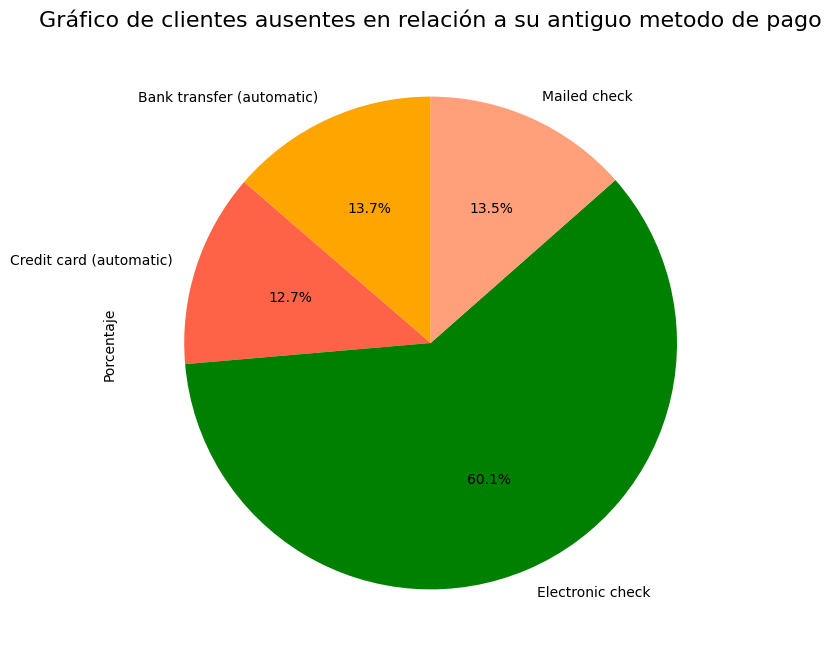

In [1012]:
clients_stay = df[df["EndDate"] ==  today]
clients_go = df[df["EndDate"] !=  today]

clients_go_by_payment = clients_go.groupby("PaymentMethod").agg({"customerID": "count"})
clients_go_by_payment = clients_go_by_payment.rename(columns={"customerID": "NumClientes"})
total_clientes_go = clients_go_by_payment["NumClientes"].sum()
clients_go_by_payment["Porcentaje"] = (clients_go_by_payment["NumClientes"]/ total_clientes_go) * 100
clients_go_by_payment["Porcentaje"] = clients_go_by_payment["Porcentaje"].round(2)
print(clients_go_by_payment["Porcentaje"])

ax = clients_go_by_payment["Porcentaje"].plot(kind = "pie", autopct= "%1.1f%%", figsize= (8,8), colors= ["orange", "tomato", "green", "lightsalmon"], legend= False, startangle = 90)
plt.title("Gráfico de clientes ausentes en relación a su antiguo metodo de pago", fontsize=16)
plt.show()




In [1013]:
clients_go.info()
clients_stay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1756 entries, 2 to 5515
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        1756 non-null   category      
 1   BeginDate         1756 non-null   datetime64[ns]
 2   EndDate           1756 non-null   datetime64[ns]
 3   Type              1756 non-null   object        
 4   PaperlessBilling  1756 non-null   object        
 5   PaymentMethod     1756 non-null   object        
 6   MonthlyCharges    1756 non-null   float64       
 7   TotalCharges      1756 non-null   float64       
 8   InternetService   1756 non-null   object        
 9   OnlineSecurity    1756 non-null   object        
 10  OnlineBackup      1756 non-null   object        
 11  DeviceProtection  1756 non-null   object        
 12  TechSupport       1756 non-null   object        
 13  StreamingTV       1756 non-null   object        
 14  StreamingMovies   1756 non-nu

                           NumClientes
PaymentMethod                         
Bank transfer (automatic)          972
Credit card (automatic)            968
Electronic check                  1187
Mailed check                       634
PaymentMethod
Bank transfer (automatic)    55.35
Credit card (automatic)      55.13
Electronic check             67.60
Mailed check                 36.10
Name: Porcentaje, dtype: float64


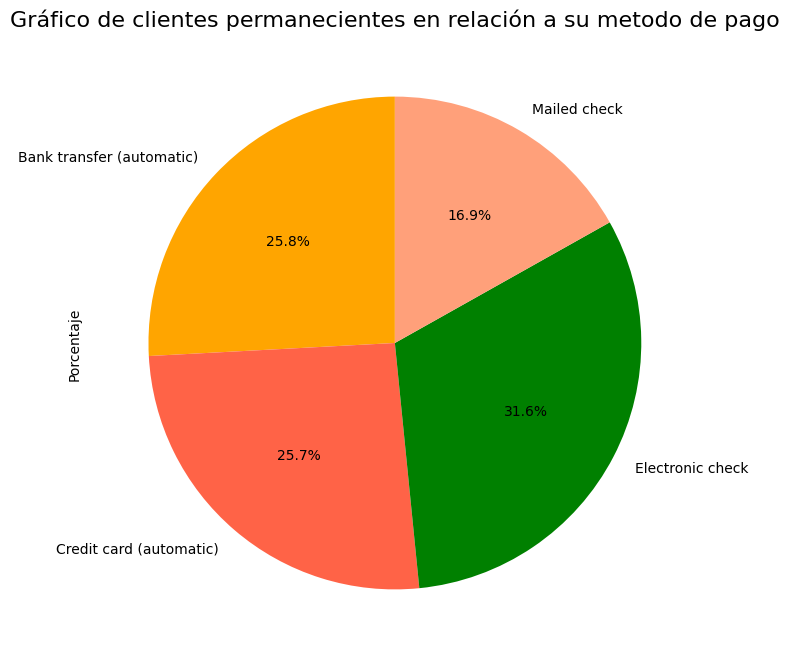

In [1014]:
clients_stay_by_payment = clients_stay.groupby("PaymentMethod").agg({"customerID": "count"})
clients_stay_by_payment = clients_stay_by_payment.rename(columns={"customerID": "NumClientes"})
print(clients_stay_by_payment)

total_clientes_stay = clients_go_by_payment["NumClientes"].sum()
clients_stay_by_payment["Porcentaje"] = (clients_stay_by_payment["NumClientes"]/ total_clientes_stay) * 100
clients_stay_by_payment["Porcentaje"] = clients_stay_by_payment["Porcentaje"].round(2)
print(clients_stay_by_payment["Porcentaje"])

ax = clients_stay_by_payment["Porcentaje"].plot(kind = "pie", autopct= "%1.1f%%", figsize= (8,8), colors= ["orange", "tomato", "green", "lightsalmon"], legend= False, startangle = 90)
plt.title("Gráfico de clientes permanecientes en relación a su metodo de pago", fontsize=16)
plt.show()

In [1015]:
dict_df_clients = [
    clients_stay, clients_go
]
month_names = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

for df in dict_df_clients:

    df['BeginDate'] = pd.to_datetime(df['BeginDate'], errors='coerce')
    df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')
    df['begin_year'] = df['BeginDate'].dt.year
    df['begin_month'] = df['BeginDate'].dt.month
    df['end_year'] = df['EndDate'].dt.year
    df['end_month'] = df['EndDate'].dt.month
    df['begin_month'] = df['begin_month'].apply(lambda x: month_names[x - 1])
    df['end_month'] = df['end_month'].apply(lambda x: month_names[x - 1])


In [1016]:
# Verifica el resultado
print(clients_go[['begin_month', 'end_month']].head())


   begin_month  end_month
2      Octubre  Diciembre
4   Septiembre  Noviembre
5        Marzo  Noviembre
8        Julio  Noviembre
12  Septiembre    Octubre


In [1017]:
clients_go["end_month"].value_counts()
time_before_say_bye = clients_go["EndDate"] - clients_go["BeginDate"]
time_before_say_bye.describe()


count                           1756
mean     566 days 10:23:14.077448744
std      598 days 19:45:30.623100768
min                 30 days 00:00:00
25%                 83 days 12:00:00
50%                306 days 00:00:00
75%                914 days 00:00:00
max               2191 days 00:00:00
dtype: object

In [1018]:
grupo_1 = (time_before_say_bye >= pd.Timedelta("30 days")) & (time_before_say_bye <= pd.Timedelta("83 days"))
grupo_2 = (time_before_say_bye >= pd.Timedelta("84 days")) & (time_before_say_bye <= pd.Timedelta("306 days"))
grupo_3 = (time_before_say_bye >= pd.Timedelta("307 days")) & (time_before_say_bye <= pd.Timedelta("914 days"))
grupo_4 = time_before_say_bye > pd.Timedelta("914 days")

In [1019]:
print("Grupo '30 a 83 dias': ", grupo_1.sum())  # Suma los `True`, es equivalente a contar los clientes
print("Grupo '84 a 306 dias'", grupo_2.sum())
print("Grupo '307 a 914 dias'", grupo_3.sum())
print("Grupo 'mas de 914 dias' ", grupo_4.sum())

Grupo '30 a 83 dias':  439
Grupo '84 a 306 dias' 443
Grupo '307 a 914 dias' 439
Grupo 'mas de 914 dias'  435


In [1020]:
is_not_senior = clients_go[clients_go['SeniorCitizen'] == 0 ]
is_senior = clients_go[clients_go['SeniorCitizen'] == 1 ]
print(is_senior['SeniorCitizen'].value_counts())
print()
print(is_not_senior['SeniorCitizen'].value_counts())


SeniorCitizen
1    471
Name: count, dtype: int64

SeniorCitizen
0    1285
Name: count, dtype: int64


In [1021]:
print(clients_go.shape[0])
print(clients_stay.shape[0])

1756
3761


In [1022]:
total = len(clients_go)
porcentaje_senior = len(is_senior) / total * 100
porcentaje_no_senior = len(is_not_senior) / total * 100

print(f"Porcentaje de adultos mayores: {porcentaje_senior:.2f}%")
print(f"Porcentaje de adultos no mayores: {porcentaje_no_senior:.2f}%")

Porcentaje de adultos mayores: 26.82%
Porcentaje de adultos no mayores: 73.18%


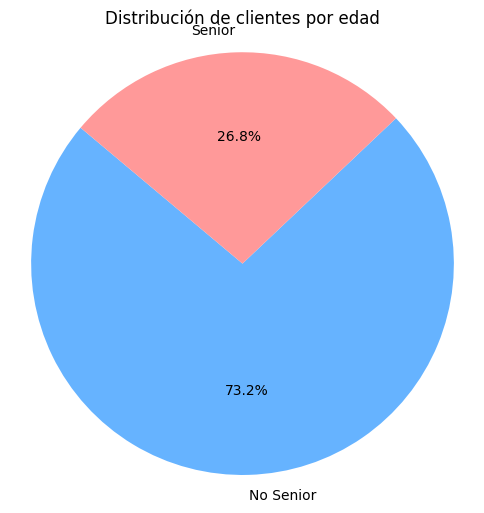

In [1023]:
labels = ['No Senior', 'Senior']
sizes = [porcentaje_no_senior, porcentaje_senior]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribución de clientes por edad')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

In [1024]:
is_not_senior_stay = clients_stay[clients_stay['SeniorCitizen'] == 0 ]
is_senior_stay = clients_stay[clients_stay['SeniorCitizen'] == 1 ]
print(is_senior_stay['SeniorCitizen'].value_counts())
print()
print(is_not_senior_stay['SeniorCitizen'].value_counts())

SeniorCitizen
1    619
Name: count, dtype: int64

SeniorCitizen
0    3142
Name: count, dtype: int64


In [1025]:
total_stay = len(clients_stay)
porcentaje_senior_stay = len(is_senior_stay) / total_stay * 100
porcentaje_no_senior_stay = len(is_not_senior_stay) / total_stay * 100

print(f"Porcentaje de adultos mayores: {porcentaje_senior_stay:.2f}%")
print(f"Porcentaje de adultos no mayores: {porcentaje_no_senior_stay:.2f}%")

Porcentaje de adultos mayores: 16.46%
Porcentaje de adultos no mayores: 83.54%


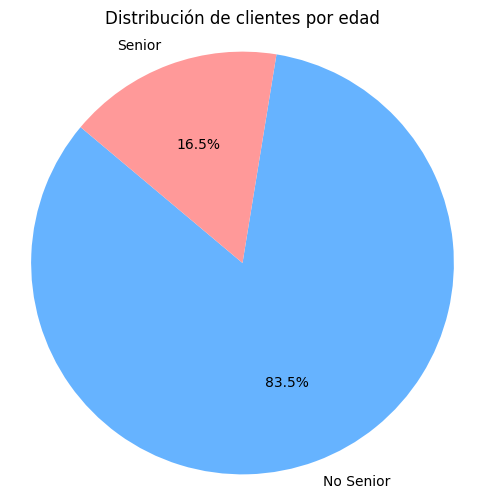

In [1026]:
labels = ['No Senior', 'Senior']
sizes = [porcentaje_no_senior_stay, porcentaje_senior_stay]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribución de clientes por edad')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

In [1027]:
clients_go_with_partner = clients_go[clients_go['Partner']== 'Yes']
clients_go_without_partner = clients_go[clients_go['Partner']== 'No']
clients_stay_with_partner = clients_stay[clients_stay['Partner']== 'Yes']
clients_stay_without_partner = clients_stay[clients_stay['Partner']== 'No']

print(clients_go_with_partner['Partner'].value_counts())
print()
print(clients_go_without_partner['Partner'].value_counts())
print()
print(clients_go.shape[0])




Partner
Yes    640
Name: count, dtype: int64

Partner
No    1116
Name: count, dtype: int64

1756


In [1028]:
porcentaje_partner = len(clients_go_with_partner) / total * 100
porcentaje_no_partner = len(clients_go_without_partner) / total * 100

porcentaje_partner_stay = len(clients_stay_with_partner) / total_stay * 100
porcentaje_no_partner_stay = len(clients_stay_without_partner) / total_stay * 100

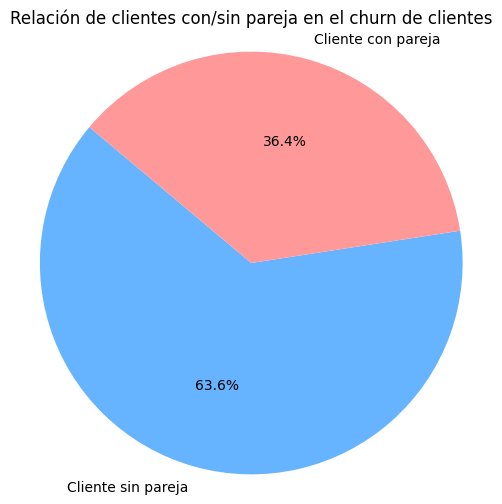

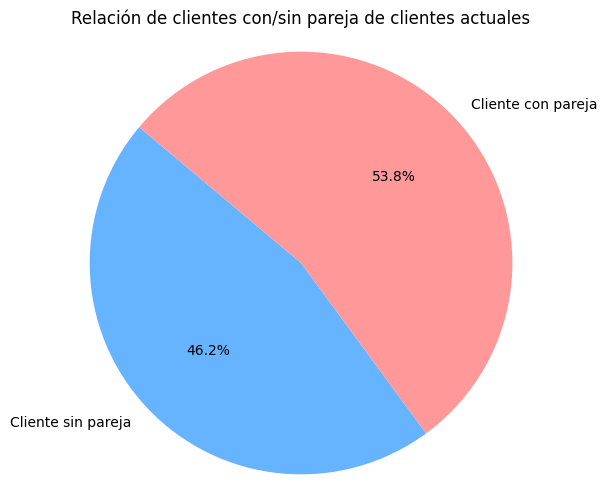

In [1029]:
labels = ['Cliente sin pareja', 'Cliente con pareja']
sizes = [porcentaje_no_partner, porcentaje_partner]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Relación de clientes con/sin pareja en el churn de clientes')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

labels = ['Cliente sin pareja', 'Cliente con pareja']
sizes = [porcentaje_no_partner_stay, porcentaje_partner_stay]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Relación de clientes con/sin pareja de clientes actuales')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

/tmp/ipykernel_77441/3092605071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clients_go, x='Type', order=clients_go['Type'].value_counts().index, palette='Set2')


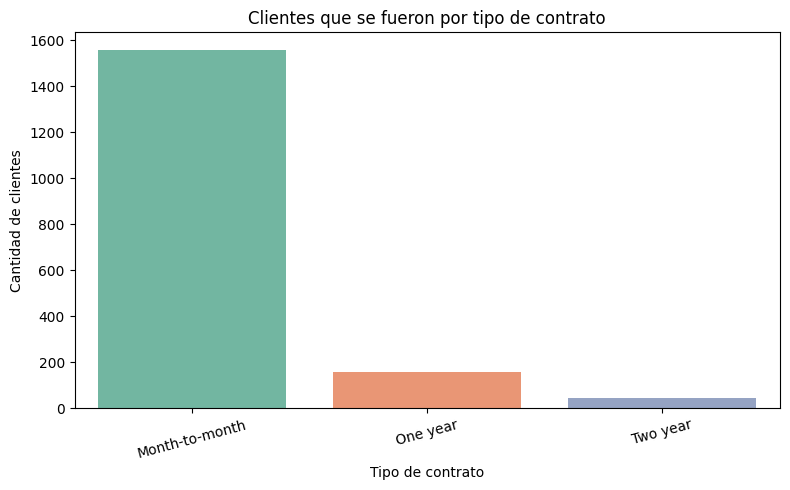

In [1030]:
plt.figure(figsize=(8,5))
sns.countplot(data=clients_go, x='Type', order=clients_go['Type'].value_counts().index, palette='Set2')
plt.title('Clientes que se fueron por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

/tmp/ipykernel_77441/1612960091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clients_go, x='InternetService', order=clients_go['InternetService'].value_counts().index, palette='Set2')


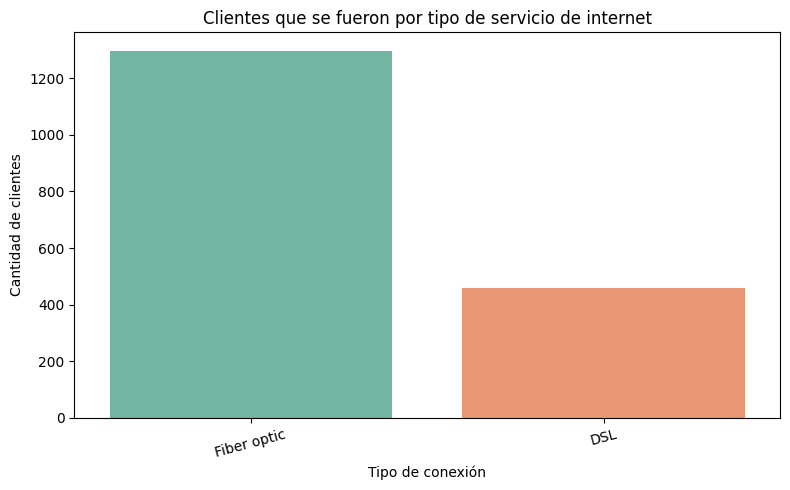

In [1031]:
plt.figure(figsize=(8,5))
sns.countplot(data=clients_go, x='InternetService', order=clients_go['InternetService'].value_counts().index, palette='Set2')
plt.title('Clientes que se fueron por tipo de servicio de internet')
plt.xlabel('Tipo de conexión')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [1032]:
clients_go_with_phone = clients_go[clients_go['MultipleLines']== 'Yes']
clients_go_without_phone = clients_go[clients_go['MultipleLines']== 'No']
clients_stay_with_phone= clients_stay[clients_stay['MultipleLines']== 'Yes']
clients_stay_without_phone = clients_stay[clients_stay['MultipleLines']== 'No']

In [1033]:
porcentaje_phone = len(clients_go_with_phone) / total * 100
porcentaje_no_phone = len(clients_go_without_phone) / total * 100

porcentaje_phone_stay = len(clients_stay_with_phone) / total_stay * 100
porcentaje_no_phone_stay = len(clients_stay_without_phone) / total_stay * 100

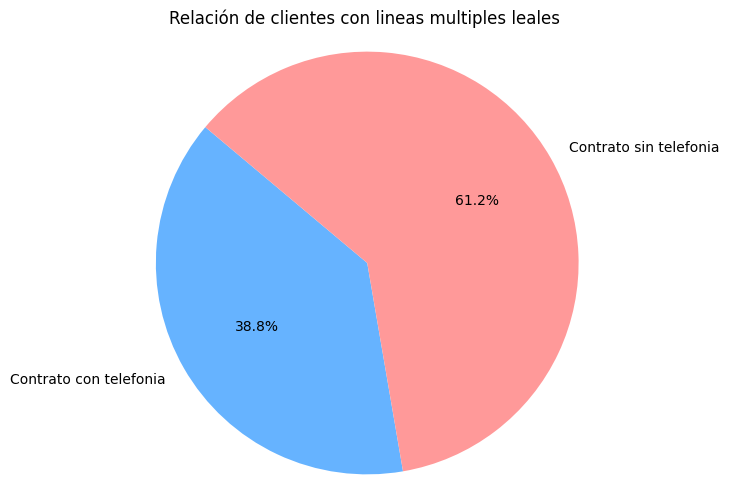

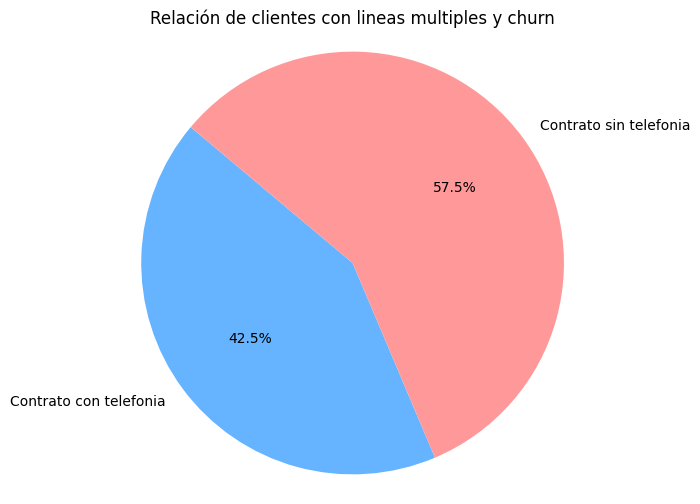

In [1034]:
labels = ['Contrato con telefonia', 'Contrato sin telefonia']
sizes = [porcentaje_no_phone_stay, porcentaje_phone_stay]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Relación de clientes con lineas multiples leales ')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

labels = ['Contrato con telefonia', 'Contrato sin telefonia']
sizes = [porcentaje_no_phone, porcentaje_phone]
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Relación de clientes con lineas multiples y churn')
plt.axis('equal')  # Hace que el pastel se vea circular
plt.show()

## Plan de acción : preparación del modelado. 

- Durante esta etapa del proyecto, se estableceran los parametros que se necesiten para preparar el entrenamiento de nuestro modelo.
- Se iniciará con la conversión de variables categóricas a variables numéricas(one-hot-encoding o label encoding).
- Escalar datos (si es necesario).
- Dividir el dataset en conjuntos de entrenamiento y prueba. 

### Combinaciones de columnas de fechas


In [1035]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'], errors='coerce')
df['EndDate'] = pd.to_datetime(df['EndDate'], errors='coerce')
df['begin_year'] = df['BeginDate'].dt.year
df['begin_month'] = df['BeginDate'].dt.month

df['EndDate'] = df['EndDate'].fillna(today)
df['antiguedad_dias'] = (df['EndDate'] - df['BeginDate']).dt.days

df.drop(['end_year', 'end_month'], axis=1, inplace=True)

print(df.info())
print()
print(df.head())



<class 'pandas.core.frame.DataFrame'>
Index: 1756 entries, 2 to 5515
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        1756 non-null   category      
 1   BeginDate         1756 non-null   datetime64[ns]
 2   EndDate           1756 non-null   datetime64[ns]
 3   Type              1756 non-null   object        
 4   PaperlessBilling  1756 non-null   object        
 5   PaymentMethod     1756 non-null   object        
 6   MonthlyCharges    1756 non-null   float64       
 7   TotalCharges      1756 non-null   float64       
 8   InternetService   1756 non-null   object        
 9   OnlineSecurity    1756 non-null   object        
 10  OnlineBackup      1756 non-null   object        
 11  DeviceProtection  1756 non-null   object        
 12  TechSupport       1756 non-null   object        
 13  StreamingTV       1756 non-null   object        
 14  StreamingMovies   1756 non-nu

In [1036]:
#cols = ['StreamingTV', 'StreamingMovies', 'Partner', 'Dependents', 'MultipleLines']

#for col in cols:
    #df[col] = df[col].map({'1': True, '0': False})


In [1037]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: True, 0: False})

In [1038]:
cols_yes_no = ['PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Partner', 'Dependents', 'MultipleLines']  # pon aquí tus columnas con Yes/No

for col in cols_yes_no:
    df[col] = df[col].map({'Yes': True, 'No': False})

In [1039]:
for col in ['Type', 'PaymentMethod', 'InternetService']:
    print(f"{col} unique values:", df[col].unique())

Type unique values: ['Month-to-month' 'Two year' 'One year']
PaymentMethod unique values: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
InternetService unique values: ['DSL' 'Fiber optic']


In [1040]:
df.drop(columns=['BeginDate'], inplace=True)


In [1041]:
df = pd.get_dummies(df, columns=['Type', 'PaymentMethod', 'InternetService', 'gender'])
print()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 1756 entries, 2 to 5515
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   customerID                               1756 non-null   category      
 1   EndDate                                  1756 non-null   datetime64[ns]
 2   PaperlessBilling                         1756 non-null   bool          
 3   MonthlyCharges                           1756 non-null   float64       
 4   TotalCharges                             1756 non-null   float64       
 5   OnlineSecurity                           1756 non-null   bool          
 6   OnlineBackup                             1756 non-null   bool          
 7   DeviceProtection                         1756 non-null   bool          
 8   TechSupport                              1756 non-null   bool          
 9   StreamingTV                              1756

In [1042]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

In [1043]:

# Normaliza 'EndDate' eliminando la hora
df['EndDate'] = pd.to_datetime(df['EndDate']).apply(lambda x: x.normalize())

# Realiza la comparación
df['EndDate_boleano'] = df['EndDate'].apply(lambda x: 0 if x == today else 1)
print(today)



2025-04-12 00:00:00


In [1044]:
print(df['EndDate'].unique())

<DatetimeArray>
['2019-12-01 00:00:00', '2019-11-01 00:00:00', '2019-10-01 00:00:00',
 '2020-01-01 00:00:00']
Length: 4, dtype: datetime64[ns]


In [1045]:
X = df.drop('EndDate', axis=1)
y = df['EndDate']

In [1046]:
# Limpieza para todos los modelos
X_clean = X.copy()

# 1. Convertir booleanos a enteros
X_clean = X_clean.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# 2. One-hot encoding para columnas categóricas tipo string
X_clean = pd.get_dummies(X_clean)

/tmp/ipykernel_77441/2847941739.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_clean = X_clean.applymap(lambda x: int(x) if isinstance(x, bool) else x)


In [1047]:
def entrenar_modelos(X, y, test_size=0.2, random_state=42,
                     logistic_params=None, rf_params=None, xgb_params=None):
    
    # Divide los datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    modelos = {
        'Logistic Regression': LogisticRegression(**(logistic_params or {})),
        'Random Forest': RandomForestClassifier(**(rf_params or {})),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', **(xgb_params or {}))
    }

    resultados = {}

    for nombre, modelo in modelos.items():
        print(f"\nEntrenando modelo: {nombre}")
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        print(f"🔍 Accuracy: {acc:.4f}")
        print("📊 Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("📝 Classification Report:")
        print(classification_report(y_test, y_pred))

        resultados[nombre] = {
            'modelo': modelo,
            'accuracy': acc,
            'y_test': y_test,
            'y_pred': y_pred
        }

    return resultados

In [1048]:
df.head()

,customerID,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Type_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,gender_Female,gender_Male,EndDate_boleano
2,3668-QPYBK,2019-12-01,True,53.85,108.15,True,True,False,False,False,...,False,False,False,False,True,True,False,False,True,1
4,9237-HQITU,2019-11-01,True,70.70,151.65,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,1
5,9305-CDSKC,2019-11-01,True,99.65,820.50,False,False,True,False,True,...,False,False,False,True,False,False,True,True,False,1
8,7892-POOKP,2019-11-01,True,104.80,3046.05,False,False,True,True,True,...,False,False,False,True,False,False,True,True,False,1
12,0280-XJGEX,2019-10-01,True,103.70,5036.30,False,True,True,False,True,...,False,True,False,False,False,False,True,False,True,1


In [1049]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1756 entries, 2 to 5515
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   customerID                               1756 non-null   category      
 1   EndDate                                  1756 non-null   datetime64[ns]
 2   PaperlessBilling                         1756 non-null   bool          
 3   MonthlyCharges                           1756 non-null   float64       
 4   TotalCharges                             1756 non-null   float64       
 5   OnlineSecurity                           1756 non-null   bool          
 6   OnlineBackup                             1756 non-null   bool          
 7   DeviceProtection                         1756 non-null   bool          
 8   TechSupport                              1756 non-null   bool          
 9   StreamingTV                              1756 

## Plan de acción : Modelado predictivo.

In [1050]:
resultados = entrenar_modelos(X_clean, y)


Entrenando modelo: Logistic Regression


/workspaces/my_last_dance/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔍 Accuracy: 0.3011
📊 Confusion Matrix:
[[19 45 12 11]
 [16 32 13 31]
 [13 28  8 38]
 [19 15  5 47]]
📝 Classification Report:
                               precision    recall  f1-score   support

2019-10-01T00:00:00.000000000       0.28      0.22      0.25        87
2019-11-01T00:00:00.000000000       0.27      0.35      0.30        92
2019-12-01T00:00:00.000000000       0.21      0.09      0.13        87
2020-01-01T00:00:00.000000000       0.37      0.55      0.44        86

                     accuracy                           0.30       352
                    macro avg       0.28      0.30      0.28       352
                 weighted avg       0.28      0.30      0.28       352


Entrenando modelo: Random Forest
🔍 Accuracy: 0.4148
📊 Confusion Matrix:
[[42 21 14 10]
 [23 41 17 11]
 [18 19 29 21]
 [16 18 18 34]]
📝 Classification Report:
                               precision    recall  f1-score   support

2019-10-01T00:00:00.000000000       0.42      0.48      0.45        87
20

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got ['2019-10-01T00:00:00.000000000' '2019-11-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2020-01-01T00:00:00.000000000']

1.  Aplicar modelos de clasificación como:
    - **Regresión logística** (como modelo base).
    - **Random forest** y/o **XGBoost** para mejorar precisión.
2. Se evaluarán los modelos usando diferentes métricas como precisión, recall, F1-Score. 
    

## Plan de acción : Conclusiones y recomendaciones. 

1. Se identificarán las variables que más influyen en la fuga de clientes.
2. Se presentarán ideas accionables para reducir la tasa de churn. 
3. Se formularán hipótesis que puedan usarse en futuras etapas de modelado predictivo o toma de decisiones.